In [3]:
import matplotlib
import numpy as np
import pandas as pd
from scipy.io import loadmat 
import mne

In [4]:
dataset = loadmat('data/sp1s_aa_1000Hz.mat')

In [5]:
# check the dictionary keys to ensure correct variables loaded

dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'clab', 'x_train', 'y_train', 'x_test'])

In [6]:
# check the shapes

print('Shape of clab: ', dataset['clab'].shape)
print('Shape of x_train: ', dataset['x_train'].shape)
print('Shape of y_train: ', dataset['y_train'].shape)
print('Shape of x_test: ', dataset['x_test'].shape)

Shape of clab:  (1, 28)
Shape of x_train:  (500, 28, 316)
Shape of y_train:  (1, 316)
Shape of x_test:  (500, 28, 100)


In [7]:
# create new variables from keys

clab = dataset['clab']
x_train = dataset['x_train']
y_train = dataset['y_train']
x_test = dataset['x_test']

In [8]:
# get into correct format fro mne(trial, channels, time samples)

x_train = np.moveaxis(x_train, [0,2], [2,0])
x_train.shape

(316, 28, 500)

In [9]:
# list of channel names in order from documentation

ch_names = [i[0] for i in clab[0]]

print(ch_names)

['F3', 'F1', 'Fz', 'F2', 'F4', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'O1', 'O2']


In [118]:
event_id = {'left_hand' : 0, 'right_hand' : 1}

In [12]:
sfreq = 1000

In [13]:
n_channels = len(ch_names)

# Initialize an info structure
info = mne.create_info(
        ch_names = ch_names,
        ch_types = ['eeg']*n_channels,
        sfreq    = sfreq 
        )   

info.set_montage('standard_1020')
print('Event created :', info)    

Event created : <Info | 8 non-empty values
 bads: []
 ch_names: F3, F1, Fz, F2, F4, FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, ...
 chs: 28 EEG
 custom_ref_applied: False
 dig: 31 items (3 Cardinal, 28 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 28
 projs: []
 sfreq: 1000.0 Hz
>


In [55]:
# Create an event matrix: events with alternating event codes

eventLength = y_train.shape[1]
ev = [(i*sfreq*.5) for i in range(eventLength)]

In [88]:
class_labels = np.array(y_train.reshape(316,), dtype=int)

In [104]:
events = np.column_stack((np.array(ev, dtype = int),
                          np.zeros(eventLength,  dtype = int),
                          test))

In [103]:
test = np.array([0,1]*158)

In [91]:
tmin = 0

In [106]:
events2 = np.column_stack((np.array(ev, dtype = int),
                          np.zeros(eventLength,  dtype = int),
                          np.ones(316, dtype = int)))

In [115]:
events2[300,2]=0

In [116]:
events2

array([[     0,      0,      1],
       [   500,      0,      1],
       [  1000,      0,      1],
       [  1500,      0,      1],
       [  2000,      0,      1],
       [  2500,      0,      1],
       [  3000,      0,      1],
       [  3500,      0,      1],
       [  4000,      0,      1],
       [  4500,      0,      1],
       [  5000,      0,      1],
       [  5500,      0,      1],
       [  6000,      0,      1],
       [  6500,      0,      1],
       [  7000,      0,      1],
       [  7500,      0,      1],
       [  8000,      0,      1],
       [  8500,      0,      1],
       [  9000,      0,      1],
       [  9500,      0,      1],
       [ 10000,      0,      1],
       [ 10500,      0,      1],
       [ 11000,      0,      1],
       [ 11500,      0,      1],
       [ 12000,      0,      1],
       [ 12500,      0,      1],
       [ 13000,      0,      1],
       [ 13500,      0,      1],
       [ 14000,      0,      1],
       [ 14500,      0,      1],
       [ 1

In [117]:
epochs = mne.EpochsArray(x_train, info, events2, tmin, event_id)

Not setting metadata
Not setting metadata
1 matching events found


ValueError: The number of epochs and the number of events must match

In [62]:
epochs = mne.EpochsArray(x_train, info)

ValueError: events must be of shape (N, 3), got (1, 316)

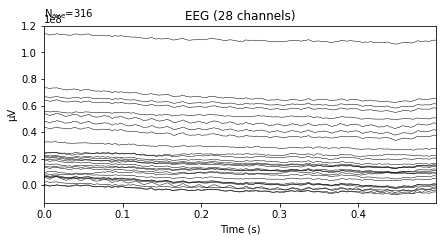

In [39]:
epochs.average().plot();

    Using multitaper spectrum estimation with 7 DPSS windows


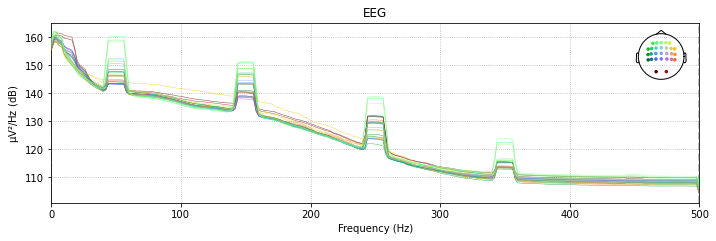

In [40]:
epochs.plot_psd();

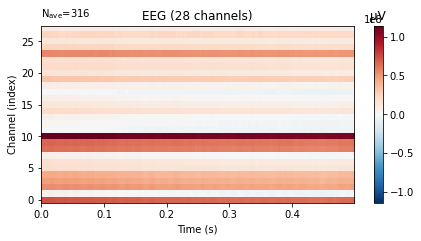

In [41]:
epochs.average().plot_image();

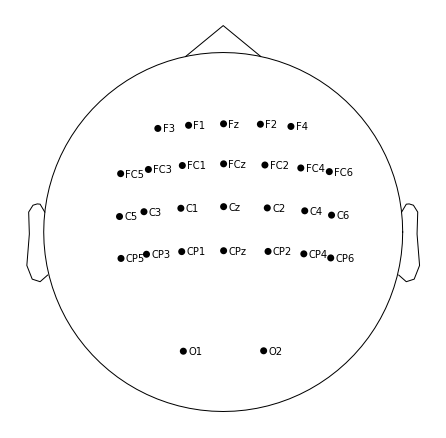

In [42]:
epochs.plot_sensors(show_names=True);

In [43]:
epochs['right_hand'].average().plot();

KeyError: 'Event "right_hand" is not in Epochs. Event_ids must be one of "1"'